In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Breast Cancer/Breast_cancer_data.csv')
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [3]:
data.shape

(569, 6)

In [4]:
# statistical info
data.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [5]:
# datatype info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [6]:
# check for null values
data.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

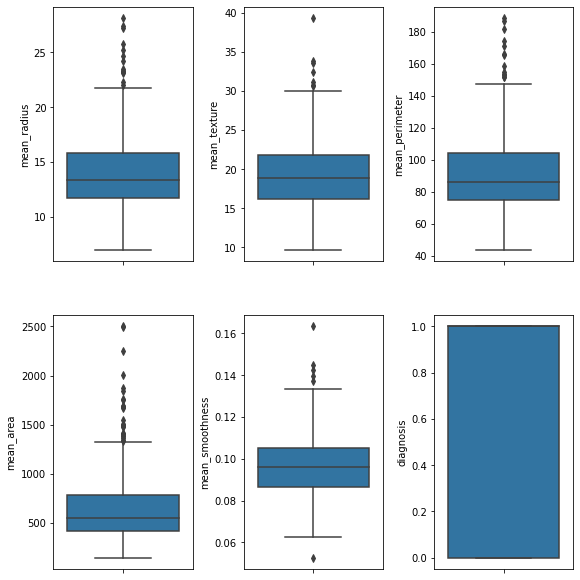

In [7]:
# create box plots
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(8,8))
index = 0
ax = ax.flatten()

for col, value in data.items():
    sns.boxplot(y=col, data=data, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

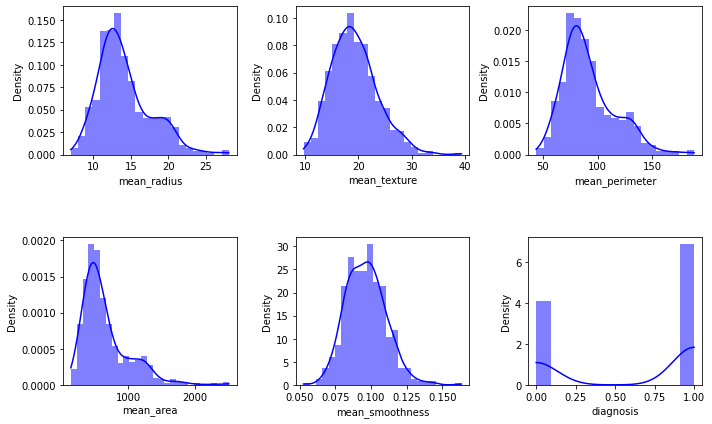

In [8]:
# create dist plot
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(10,6))
index = 0
ax = ax.flatten()

for col, value in data.items():
    sns.histplot(value, ax=ax[index], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)
    index += 1
plt.tight_layout(w_pad=0.7, h_pad=5.0)

In [10]:
data['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [12]:
x = data.drop('diagnosis',axis=1)
y = data['diagnosis']

In [13]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split,GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print(f'Rows in train set: {len(x_train)}\nRows in test set: {len(x_test)}')

Rows in train set: 455
Rows in test set: 114


In [14]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [22]:
from sklearn.svm import SVC
svm_model = SVC()
classifier = svm_model.fit(x_train,y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print('The accuracy matrix is')
print(cm)

acc = accuracy_score(y_test,y_pred)*100
print('The Accuracy in % is {}'.format(acc))

The accuracy matrix is
[[40  3]
 [ 3 68]]
The Accuracy in % is 94.73684210526315


In [23]:
#Fitting Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression()
classifier_lr.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier_lr.predict(x_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print('The accuracy matrix is')
print(cm)

acc = accuracy_score(y_test,y_pred)*100
print('The Accuracy in % is {}'.format(acc))

The accuracy matrix is
[[39  4]
 [ 3 68]]
The Accuracy in % is 93.85964912280701


In [25]:
#Fitting the K-NN model
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier()
classifier_knn.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier_knn.predict(x_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print('The accuracy matrix is')
print(cm)

acc = accuracy_score(y_test,y_pred)*100
print('The Accuracy in % is {}'.format(acc))

The accuracy matrix is
[[39  4]
 [ 4 67]]
The Accuracy in % is 92.98245614035088
